In [4]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = (
    pd.read_excel('data.xlsx',0,header=[0,1]).iloc[:,1:]
    .join(pd.read_excel('data.xlsx',1,header=[0,1]).iloc[:,1:])
)

# Clean column names
clean_names = {'NWP (£m) ': 'NWP',
               'SCR (£m)': 'SCR',
               'EoF for SCR (£m)': 'EoF_SCR',
               'SCR coverage ratio': 'SCRR',
               'GWP (£m)': 'GWP',
               'Total assets (£m)': 'Assets',
               'Total liabilities (£m)': 'Liabilities',
               'Excess of assets over liabilities (£m) [= equity]': 'Equity',
               'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)': 'GBEL', # best estimate liability
               'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)': 'NBEL',
               'Gross claims incurred (£m)': 'GCI',
               'Gross combined ratio': 'GCR',
               'Gross expense ratio': 'GER',
               'Net combined ratio': 'NCR',
               'Net expense ratio': 'NER',
               'Pure gross claims ratio': 'PGCR',
               'Pure net claims ratio':'PNCR'}

df.columns = pd.MultiIndex.from_tuples([(clean_names[col[0]], int(col[1][:4])) for col in df.columns])

# Add Firm column
df = df.reset_index(names='Firm')
df['Firm'] += 1

# Remove rows with 0 throughout (excl. Firm column) and reset index
df = df.loc[(df[df.columns[1:]]!=0).any(axis=1)].reset_index(drop=True)

# Replace 0 with NaN
df = df.replace(0,np.nan)

# add to column later!
years = [*range(2016)]
df

Firm           NWP                                             
                  2016          2017          2018          2019   
0      1 -13779.815629           NaN           NaN           NaN  \
1      2     28.178059     26.865049     25.064438     23.226445   
2      3           NaN     75.609681     70.578732     78.432782   
3      4  22344.199923  23963.910709  25760.390158  25512.748836   
4      5     68.200993     51.663132     44.010833     42.008556   
..   ...           ...           ...           ...           ...   
318  321           NaN           NaN     -1.011367     -6.599067   
319  322   2092.156137   2084.124818   2022.212247   2103.048716   
320  323           NaN           NaN           NaN           NaN   
321  324     23.415380     22.650321     24.268465     25.811984   
322  325    240.999886    252.698937    332.521848    294.886332   

                            SCR                                             
             2020          2016          2017          2018          2019   
0             NaN   1085.360139  9.635840e-09           NaN           NaN  \
1       21.718558     10.190314  1.011357e+01      9.495235      8.146471   
2       85.735830    322.955115  3.637823e+02    362.290859    394.295982   
3    24996.021042  16573.644800  1.633275e+04  17103.616000  17219.246080   
4       81.273653     52.824396  3.805377e+01     34.696815     57.231788   
..            ...           ...           ...           ...           ...   
318     24.632234           NaN  2.586211e-01     62.227588     51.830942   
319   2029.697013   1711.220667  1.641309e+03   1329.471064   1399.098954   
320           NaN     30.438558  1.523262e+01      5.332069      1.551370   
321     26.546638     32.096633  3.020595e+01     29.517977     29.954935   
322           NaN    209.181524  2.238009e+02    256.862723    240.295897   

     ...       GER                                                GCR   
     ...      2016       2017      2018      2019      2020      2016   
0    ...       NaN  56.813725       NaN       NaN       NaN       NaN  \
1    ...  0.743265   0.963451  0.814588       NaN       NaN  0.945394   
2    ...       NaN        NaN       NaN       NaN       NaN       NaN   
3    ...  0.143930   0.147519  0.092971  0.054781 -0.546237  0.848032   
4    ...  0.177212   0.134310  0.109074  0.121044  0.109187  0.508711   
..   ...       ...        ...       ...       ...       ...       ...   
318  ...  0.211938   0.256118  0.245704  0.236224  0.278674  0.978004   
319  ...  0.364543   0.372169  0.398770  0.420327  0.373813  0.885956   
320  ...       NaN        NaN       NaN       NaN       NaN       NaN   
321  ...  0.427635   0.371681  0.357627  0.330893  0.302577  1.063136   
322  ...  0.044248   0.040154  0.037627  0.043566  0.045283  0.164648   

                                               
          2017      2018      2019       2020  
0    68.215239       NaN       NaN        NaN  
1     1.126744  0.939197       NaN        NaN  
2          NaN       NaN       NaN        NaN  
3     1.474778  1.727968  1.208823 -10.736084  
4     1.259454  1.304168  0.983277   0.997184  
..         ...       ...       ...        ...  
318   1.002691  0.972540  0.958443   0.816870  
319   0.960993  0.913687  0.943246   0.995833  
320        NaN       NaN       NaN        NaN  
321   1.006945  0.982816  0.994712   0.780065  
322   0.183376  0.427933  0.274733   0.180449  

[323 rows x 86 columns]

In [2]:
df.describe()

Firm           NWP                                             
                           2016          2017          2018          2019   
count  323.000000    212.000000    236.000000    225.000000    209.000000  \
mean   163.095975    977.463312   1101.159009   1219.155846   1216.608946   
std     94.220272   4746.833699   3816.683875   4382.319593   4248.028748   
min      1.000000 -13779.815629  -2305.854316   -193.083319   -181.612136   
25%     81.500000      5.136382      6.529286      8.480503      8.477107   
50%    163.000000     31.230055     45.920733     46.537593     49.969381   
75%    244.500000    285.080106    341.110160    371.149157    301.968548   
max    325.000000  45309.838702  38199.311256  48117.993733  44638.769640   

                              SCR                                             
               2020          2016          2017          2018          2019   
count    191.000000  2.930000e+02  2.920000e+02  2.790000e+02  2.620000e+02  \
mean    1120.229434  3.967971e+02  3.950758e+02  3.870793e+02  4.033593e+02   
std     3898.843087  1.454835e+03  1.532259e+03  1.434958e+03  1.491830e+03   
min    -1336.553317  9.635840e-07  9.635840e-09  9.635840e-07  9.635840e-07   
25%        9.014373  6.942596e+00  5.050513e+00  5.643700e+00  4.915070e+00   
50%       40.889624  3.118304e+01  2.966932e+01  2.966234e+01  3.103866e+01   
75%      308.100278  1.551227e+02  1.284209e+02  1.372080e+02  1.296773e+02   
max    40135.692258  1.657364e+04  1.633275e+04  1.710362e+04  1.721925e+04   

       ...         GER                                                       
       ...        2016         2017         2018          2019        2020   
count  ...  181.000000   198.000000   192.000000  1.820000e+02  174.000000  \
mean   ...   -1.263737   -31.814775    22.440577  7.374390e+03   11.275304   
std    ...   36.640237   633.552649   294.928003  9.948018e+04   78.596476   
min    ... -380.384839 -8773.158812    -0.284546 -2.171850e+02   -0.819082   
25%    ...    0.263227     0.258863     0.267010  2.598448e-01    0.251589   
50%    ...    0.334907     0.340059     0.336817  3.182542e-01    0.323681   
75%    ...    0.395292     0.406391     0.398881  3.827483e-01    0.414095   
max    ...  195.826969  1302.885928  4087.264516  1.342061e+06  783.679916   

              GCR                                                         
             2016          2017          2018          2019         2020  
count  182.000000    199.000000    192.000000  1.820000e+02   174.000000  
mean    -1.454271   -149.857788     66.797772  1.786040e+04    29.583315  
std     52.453049   2464.923234    895.568045  2.411421e+05   189.575346  
min   -512.124779 -34649.424832   -158.956897 -2.907626e+03   -10.736084  
25%      0.787164      0.825370      0.848386  8.457197e-01     0.824098  
50%      0.892251      0.976459      0.947680  9.362770e-01     0.939782  
75%      1.021319      1.176834      1.065959  1.047133e+00     1.074936  
max    198.277905   2122.656992  12408.537362  3.253169e+06  1916.102674  

[8 rows x 86 columns]

C:\Users\jeanm\AppData\Local\Temp\ipykernel_26912\2901683442.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plotdata.Firm)
C:\Users\jeanm\AppData\Local\Temp\ipykernel_26912\2901683442.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


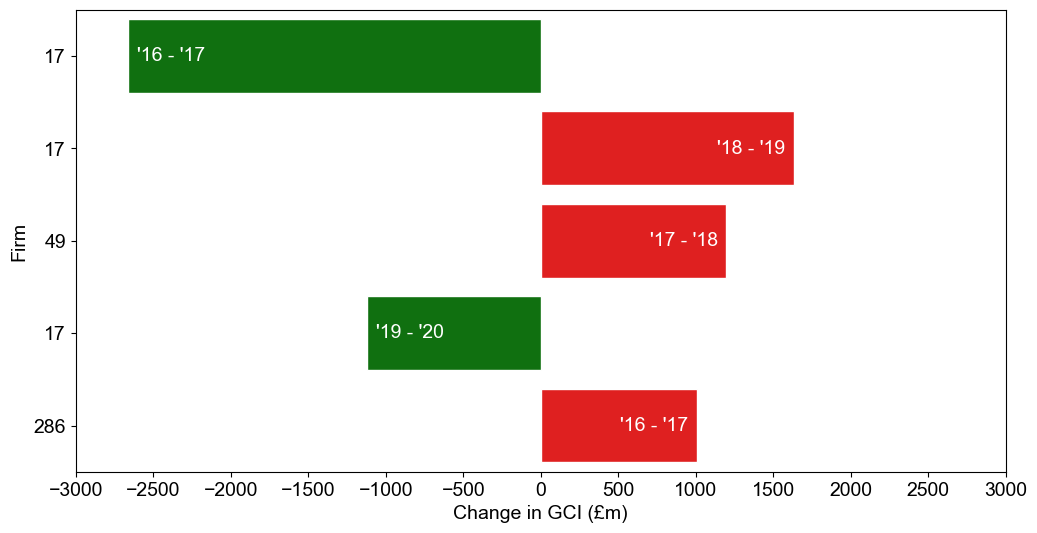

In [6]:
# Largest changes in GCI over last four years
plotdata = pd.melt(df['GCI'].diff(axis='columns').join(df['Firm']).drop(columns=2016),
                id_vars='Firm', var_name='year', value_name='delta') \
        .sort_values(by='delta', key=lambda x:-abs(x)) \
        .head(5)

# Make GCI drops green and spikes red
custom_palette = {}
for i in plotdata.index:
    if plotdata.loc[i,'delta'] > 0:
        custom_palette[i] = 'r'
    else:
        custom_palette[i] = 'g'

# Draw plot
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
hbars = sns.barplot(x='delta', y=plotdata.index, hue=plotdata.index,  data=plotdata, orient='h', legend=False, 
            order=plotdata.sort_values(by='delta', key=lambda x:-abs(x)).index, palette=custom_palette)
# Adjust plot settings
ax.set_yticklabels(plotdata.Firm)
ax.set_xlim(-3000,3000)
ax.set_xticks([*range(-3000,3500,500)])
ax.set_xlabel('Change in GCI (£m)')
ax.set_ylabel('Firm')
# Make labels
for container in ax.containers:
    year = plotdata.loc[plotdata['delta'] == container.datavalues[0],'year'].values[0]
    label = ["'" + str(year-1)[2:] + " - '" + str(year)[2:]]
    ax.bar_label(container, labels=label, padding=-55, color='white')

fig.show()
plt.savefig('largest_gcis.png',dpi=200,bbox_inches='tight')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_26912\322593681.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


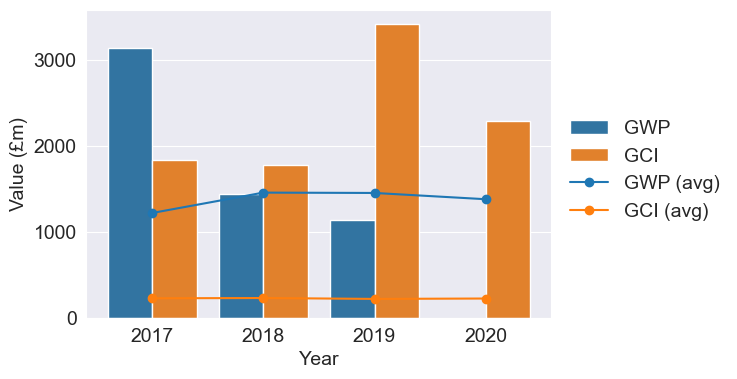

In [8]:
# Recalc avg

plotdata = pd.melt(df.loc[df['Firm'] == 17,(['GWP','GCI'],range(2017,2021))],
                   var_name=['metric','Year'])
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(plotdata, x='Year', y='value', hue='metric')
plt.plot(df.loc[:,('GWP',range(2017,2021))].mean().array,marker='o', label='GWP (avg)')
plt.plot(df.loc[:,('GCI',range(2017,2021))].mean().array,marker='o', label='GCI (avg)')
ax.set_ylabel('Value (£m)')

plt.legend(loc='upper right',bbox_to_anchor=(1.4,.7),framealpha=0)

plt.savefig('closeup_gci_jump.png',dpi=200,bbox_inches='tight')
fig.show()

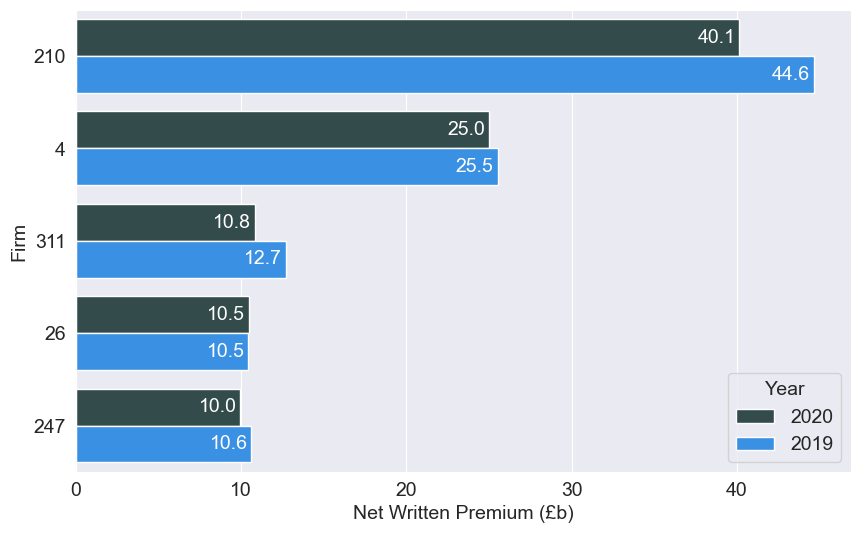

In [9]:
# NWP over the last two years
plotdata = df.sort_values(
    by=('NWP',2020),ascending=False).loc[:,(['Firm','NWP'],[2019,2020])].head(5)
plotdata.columns = plotdata.columns.droplevel()
plotdata = plotdata / 1000
plotdata = plotdata.join(df['Firm'])

df_melted = pd.melt(plotdata, id_vars='Firm', var_name='Year', value_name='NWP')

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x='NWP', y='Firm', hue='Year', data=df_melted, orient='h', 
            order=df_melted.sort_values(by=['Year','NWP'], ascending=False).Firm, 
            hue_order=[2020,2019], palette=['darkslategray','dodgerblue'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.1f', padding=-30, color='white')
ax.set_xlabel('Net Written Premium (£b)')

plt.savefig('biggest_nwp.png',dpi=200,bbox_inches='tight')
plt.show()

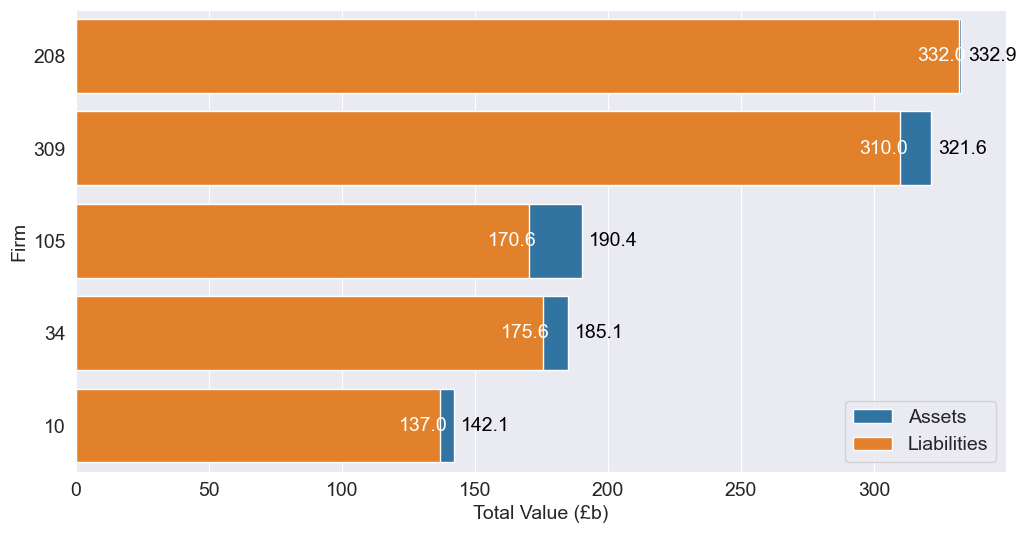

In [10]:
# Assets and liabilities top 5
plotdata = df.sort_values(
    by=('Assets',2020),ascending=False).loc[:,(['Assets','Liabilities'],2020)].head(5)
plotdata.columns = plotdata.columns.droplevel(1)
plotdata = plotdata / 1000 # Convert to billions
plotdata['Firm'] = plotdata.index + 1


# Plot
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

ax = sns.barplot(x='Assets', y='Firm',  data=plotdata, orient='h', 
            order=plotdata.sort_values(by=['Assets'], ascending=False).Firm, label='Assets')
ax.bar_label(ax.containers[0], fmt='%.1f', padding=5, color='black')

ax = sns.barplot(x='Liabilities', y='Firm',  data=plotdata, orient='h', 
            order=plotdata.sort_values(by=['Assets'], ascending=False).Firm, label='Liabilities')
ax.bar_label(ax.containers[1], fmt='%.1f', padding=-30, color='white')

ax.legend(loc="lower right")
ax.set_xlabel('Total Value (£b)')

plt.savefig('biggest_assets.png',dpi=200,bbox_inches='tight')
plt.show()